In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
#Importing necessary ML Frameworks
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaModel
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Loading the dataset
df = pd.read_csv('FRS.csv')

In [ ]:
df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [ ]:
df.describe()

,Food_ID
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


In [ ]:
#Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


In [ ]:
#Determining Shape
df.shape

(400, 5)

In [ ]:
#Checking null values
df.isnull().sum()

Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64

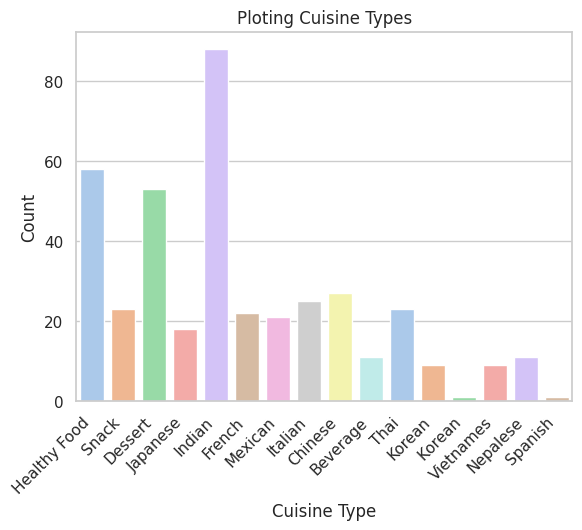

In [ ]:
# Count plot for the 'C_type' column
sns.set(style="whitegrid")
sns.countplot(data=df, x='C_Type', palette='pastel')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Ploting Cuisine Types')
plt.xticks(rotation=45, ha='right')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Healthy Food'),
  Text(1, 0, 'Snack'),
  Text(2, 0, 'Dessert'),
  Text(3, 0, 'Japanese'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'French'),
  Text(6, 0, 'Mexican'),
  Text(7, 0, 'Italian'),
  Text(8, 0, 'Chinese'),
  Text(9, 0, 'Beverage'),
  Text(10, 0, 'Thai'),
  Text(11, 0, 'Korean'),
  Text(12, 0, ' Korean'),
  Text(13, 0, 'Vietnames'),
  Text(14, 0, 'Nepalese'),
  Text(15, 0, 'Spanish')])

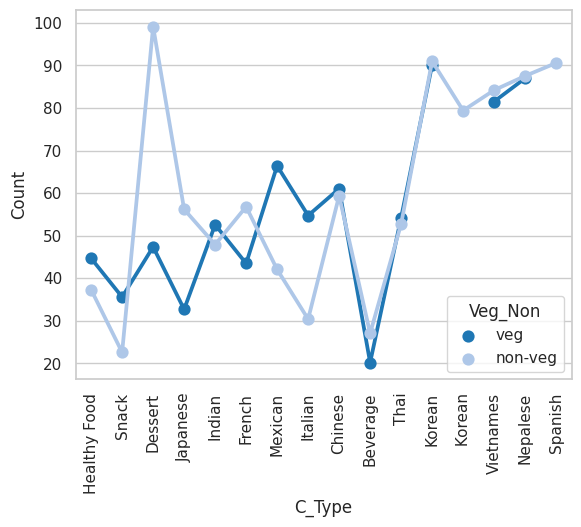

In [ ]:
#PointPlot
df['Count'] = np.linspace(1, 100, len(df))
sns.pointplot(data=df, x='C_Type', y='Count', hue='Veg_Non', errorbar=None, palette='tab20')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Heatmap')

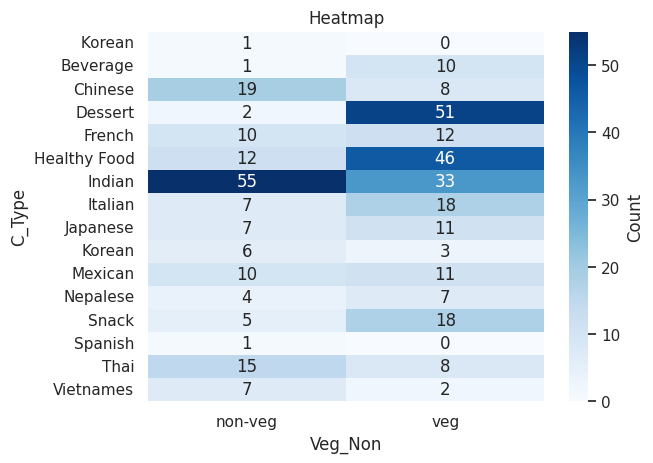

In [ ]:
#Heatmap
sns.heatmap(pd.crosstab(df['C_Type'], df['Veg_Non']), cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title("Heatmap")

Text(0.5, 0, 'Pie-Chart')

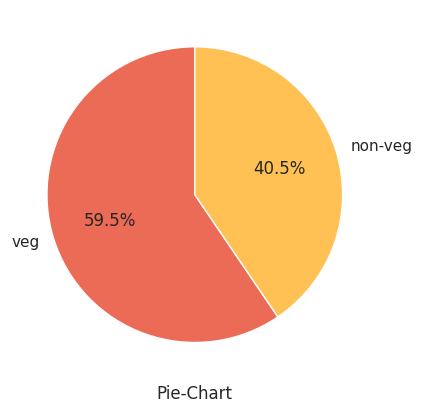

In [ ]:
#Pie-Chart
plt.pie(df['Veg_Non'].value_counts(), labels=df['Veg_Non'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#EC6B56','#FFC154'])
plt.xlabel("Pie-Chart")

Text(0, 0.5, 'Count')

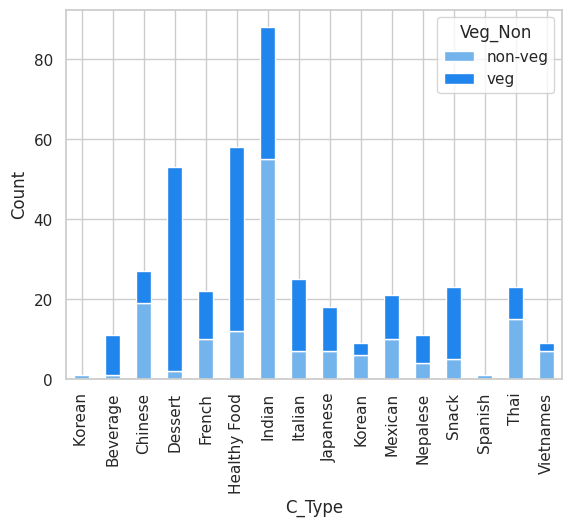

In [ ]:
#Cross-Tab Plot
pd.crosstab(df['C_Type'], df['Veg_Non']).plot(kind='bar', stacked=True, color=['#72b4eb','#2085ec'])
plt.ylabel("Count")

In [ ]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Tokenize the input descriptions using RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
#Tokenize the input descriptions for train and test data
train_tokens = tokenizer(train_df['Describe'].tolist(), padding=True, truncation=True, return_tensors='pt')
test_tokens = tokenizer(test_df['Describe'].tolist(), padding=True, truncation=True, return_tensors='pt')

In [ ]:
type(train_tokens)

transformers.tokenization_utils_base.BatchEncoding

In [ ]:
# Load RoBERTa model
model = RobertaModel.from_pretrained('roberta-base')

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Extract embeddings from RoBERTa model
with torch.no_grad():
    train_embeddings = model(**train_tokens)['last_hidden_state'][:, 0, :]
    test_embeddings = model(**test_tokens)['last_hidden_state'][:, 0, :]

In [ ]:
# Calculate cosine similarity between flattened embeddings
cosine_sim = cosine_similarity(train_embeddings, test_embeddings)

In [ ]:
# Prediction step
def predict_recommendations(test_item_indices):
    all_recommendations = []
    for index in test_item_indices:
        recommendations = recommend_top_N_items(index)
        all_recommendations.append(recommendations)
    return all_recommendations

# Example prediction for multiple test items
test_item_indices = [0, 1, 2]
all_predictions = predict_recommendations(test_item_indices)
for i, recommendations in zip(test_item_indices, all_predictions):
    print(f"Recommendations for '{test_df.iloc[i]['Name']}':")
    print(recommendations)

Recommendations for 'quinoa coconut crumble custard':
     Food_ID                        Name   C_Type  Veg_Non  \
201      202  pista chocolate & mandarin  Dessert      veg   
258      259  ragi coconut ladoo (laddu)  Dessert      veg   
137      138          malabar fish curry   Indian  non-veg   
375      376      Pineapple-Coconut Rice     Thai      veg   
52        53              chocolate appe    Snack      veg   

                                              Describe  
201  Pistachios, milk, sugar, broken rice, green ca...  
258  finger millet flour (ragi), jaggery, peanuts, ...  
137  whole coriander seeds, whole red chilli, cocon...  
375  brown rice, coconut milk, onion, carrot, cashe...  
52   rice, coconut, baking powder, vanilla extract,...  
Recommendations for 'coconut mango oatmeal with cinnamon hint':
     Food_ID                               Name    C_Type Veg_Non  \
64        65     almond  white chocolate gujiya  Japanese     veg   
256      257            ragi 

In [ ]:
# Recommend top N items for each test item
def recommend_top_N_items(item_index, N=5):
    sim_scores = cosine_sim[:, item_index]
    top_N_indices = sim_scores.argsort()[-N-1:-1][::-1]  # Get top N indices (excluding the item itself)
    return train_df.iloc[top_N_indices][['Food_ID', 'Name', 'C_Type', 'Veg_Non', 'Describe']]



In [ ]:
test_df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe,Count
209,210,quinoa coconut crumble custard,Dessert,veg,"Knoia (cooked), oats, cinnamon powder, salt, b...",52.857143
280,281,coconut mango oatmeal with cinnamon hint,Healthy Food,veg,"coconut (tender), coconut milk, oats, ripe man...",70.473684
33,34,mixed berry & banana smoothie,Healthy Food,veg,"Frozen mixed berries, ripped banana,fresh oran...",9.187970
210,211,lamb barley pot,Healthy Food,non-veg,"pot barley, onions, worcestershire sauce, chil...",53.105263
93,94,chicken sukka,Indian,non-veg,"chicken (small pieces), onion (thin slices), c...",24.075188


In [ ]:
# Example recommendation for the first test item
test_item_index = 5
recommendations = recommend_top_N_items(test_item_index)
print(f"Recommendations for '{test_df.iloc[test_item_index]['Name']}':")
print(recommendations)

Recommendations for 'garlic and pinenut soup with burnt butter essence':
     Food_ID                                      Name        C_Type  Veg_Non  \
399      400               Rosemary Roasted Vegetables  Healthy Food      veg   
194      195                          egg in a blanket        French  non-veg   
160      161                          spanish fish fry       Mexican  non-veg   
103      104                            chilli chicken       Chinese  non-veg   
86        87  roasted spring chicken with root veggies  Healthy Food  non-veg   

                                              Describe  
399  kosher salt, rosemary, garlic, potato, olive o...  
194  eggs, brown bread slices, butter, chilli flake...  
160  Sol fish, tomato, onion, lemon juice, olive oi...  
103  boneless chicken, salt, cornflour, black peppe...  
86   whole chicken, thyme, garlic, lemon, orange, s...  


In [ ]:
test_item_index = 1
recommendations = recommend_top_N_items(test_item_index)
print(f"Recommendations for '{test_df.iloc[test_item_index]['Name']}':")
print(recommendations)

Recommendations for 'coconut mango oatmeal with cinnamon hint':
     Food_ID                               Name    C_Type Veg_Non  \
64        65     almond  white chocolate gujiya  Japanese     veg   
256      257            ragi oats ladoo (laddu)   Dessert     veg   
41        42                   sugar free modak  Japanese     veg   
243      244  jalebi with fennel yogurt pudding   Dessert     veg   
2          3               sweet chilli almonds     Snack     veg   

                                              Describe  
64   all-purpose flour, clarified butter (ghee), wa...  
256  ragi flour, oats flour, dates (ripe), milk, ho...  
41   seedless dates, almonds, cashew nuts, walnuts,...  
243  all purpose flour, yogurt, oil, sugar, water, ...  
2    almonds whole, egg white, curry leaves, salt, ...  
